<a href="https://colab.research.google.com/github/MohamedAmine095/Amine-GomyCode1/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
df=pd.read_csv('movies11.csv',encoding='ISO-8859-1')
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


Let's check if there are any missing values

In [77]:
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

The release date is not very important for our study so we will drop the column and also rename the gross column as revenue.

In [78]:
df=df.drop(columns='released',axis=1)
df.rename({'gross':'revenue'},axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   revenue   6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   runtime   6820 non-null   int64  
 9   score     6820 non-null   float64
 10  star      6820 non-null   object 
 11  votes     6820 non-null   int64  
 12  writer    6820 non-null   object 
 13  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 746.1+ KB


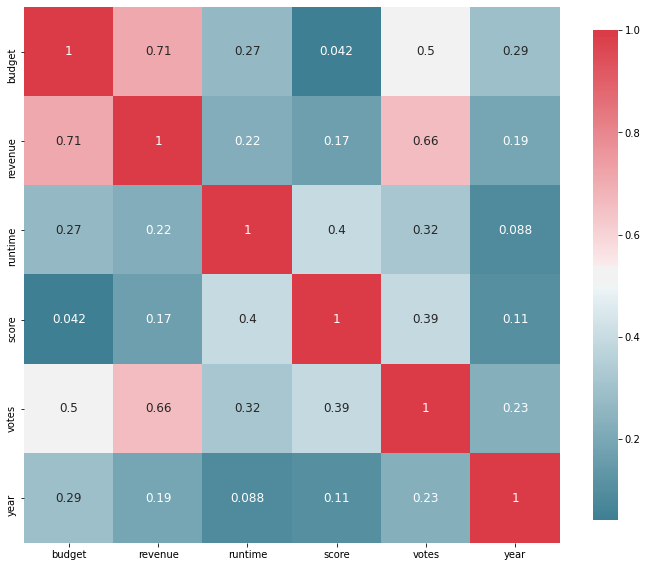

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

> Our target is the movies' revenues data.Thanks to this correlogram we can conclude that the budget and votes would
be our initial features to express the predictive model.
In fact we all know the importance of the financial ressources for any project and thus in cinema.

> Any artistic work depends always on comments and critics which makes votes very important to explain the success of the movie.

> As we can see,the score has not a good correlation with the revenue which logically cannot be easily accepted because of the impact that have any rating on cinephiles and also on the movie's revenue.Yet, the score at itself can't give us an idea about the movie's quality and the way people perceive it, because this feature depends on two important data which are: the number of votes for each movie and the rate that got the film.For example, in this same "rating logic", a movie  having a mark of 8 but with only 10 voters will always be considered better than another movie rated 7 but with 1000 people voting for it.So,we decided to change the rating method and adopt the weighted rating take into consideration both number of voters and ratings in order to have more homogenous data.

> This is the chosen formula:
WeightedRating(WR)= R*V/M      
> with :
1.   R: The actual score of the movie
2.   V:The number of votes for the movie
3.   M:The total number of votes

In [80]:
m=df['votes'].sum()
def WR(x,m=m):
  s=x['score']
  v=x['votes']
  return s*v/m
df['weighted rate']=df.apply(WR,axis=1)

In [81]:
df.head()

,budget,company,country,director,genre,revenue,name,rating,runtime,score,star,votes,writer,year,weighted rate
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,89,8.1,Wil Wheaton,299174,Stephen King,1986,0.004989
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,103,7.8,Matthew Broderick,264740,John Hughes,1986,0.004251
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,110,6.9,Tom Cruise,236909,Jim Cash,1986,0.003365
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,137,8.4,Sigourney Weaver,540152,James Cameron,1986,0.009341
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,0.000520


In [82]:
df.describe()

,budget,revenue,runtime,score,votes,year,weighted rate
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000,6.820000e+03
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293,1.040819e-03
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501,2.162819e-03
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000,2.445868e-07
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000,9.468474e-05
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000,3.295659e-04
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000,1.017151e-03
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000,3.564522e-02


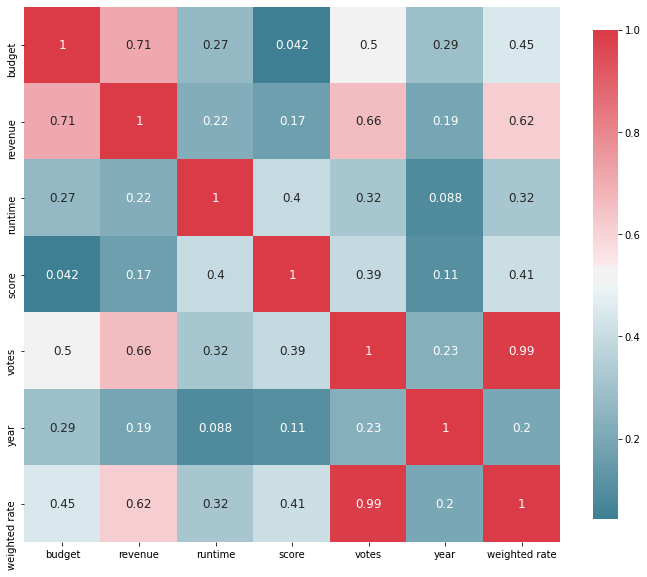

In [83]:
plot_correlation_map(df)

> The weighted rate's correlation with our initial target (the revenue) is way too better than the score's one.It is obvious that the new feature is more significant since we are dealing with movies having different number of votes and dissimilar ratings.

> As we've seen previously, we do not have NaN values, but we can have some zero "non-missing" numerical values in some columns which may lead us to the same NaN problem ,so let's re-check the whole values in our dataset.

In [84]:
for i in df.columns:
    x = df[i].value_counts()
    print("Column name is:",i.upper())
    print(x)
    print()

Column name is: BUDGET
0.0            2182
20000000.0      207
30000000.0      191
25000000.0      177
15000000.0      170
               ... 
29000001.0        1
128000000.0       1
24500000.0        1
300000.0          1
5800000.0         1
Name: budget, Length: 351, dtype: int64

Column name is: COMPANY
Universal Pictures                        302
Warner Bros.                              294
Paramount Pictures                        259
Twentieth Century Fox Film Corporation    205
New Line Cinema                           172
                                         ... 
First Take                                  1
Black Entertainment Television (BET)        1
Luna Films                                  1
Mosaic Film Group                           1
Kanoon                                      1
Name: company, Length: 2179, dtype: int64

Column name is: COUNTRY
USA                               4872
UK                                 698
France                             283
Ca

The budget contains too many null cells so we decided to replace them by the mean of the entire column

In [85]:
df['budget'].describe()

count    6.820000e+03
mean     2.458113e+07
std      3.702254e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+07
75%      3.200000e+07
max      3.000000e+08
Name: budget, dtype: float64

In [86]:
df.loc[df['budget'] ==0, 'budget'] = df['budget'].mean()
df['budget'].describe()

count    6.820000e+03
mean     3.244565e+07
std      3.339852e+07
min      6.000000e+03
25%      1.500000e+07
50%      2.458113e+07
75%      3.200000e+07
max      3.000000e+08
Name: budget, dtype: float64

Let's study the distributions and relationships between different features in our dataset.

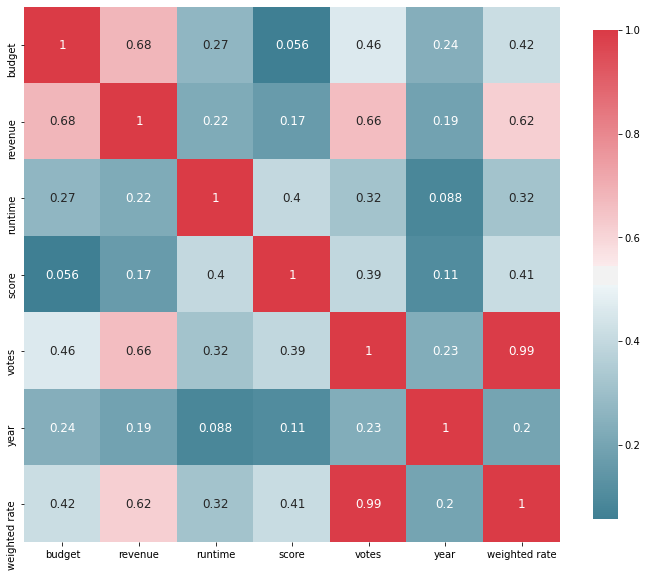

In [87]:
plot_correlation_map(df)

The revenue-budget correlation has a bit lowered since our last data modification (replacing null values by mean).
This correlogram may be explained by a pairwise relationship plotting of the dataset.In other words features correlations will be studied graphically.

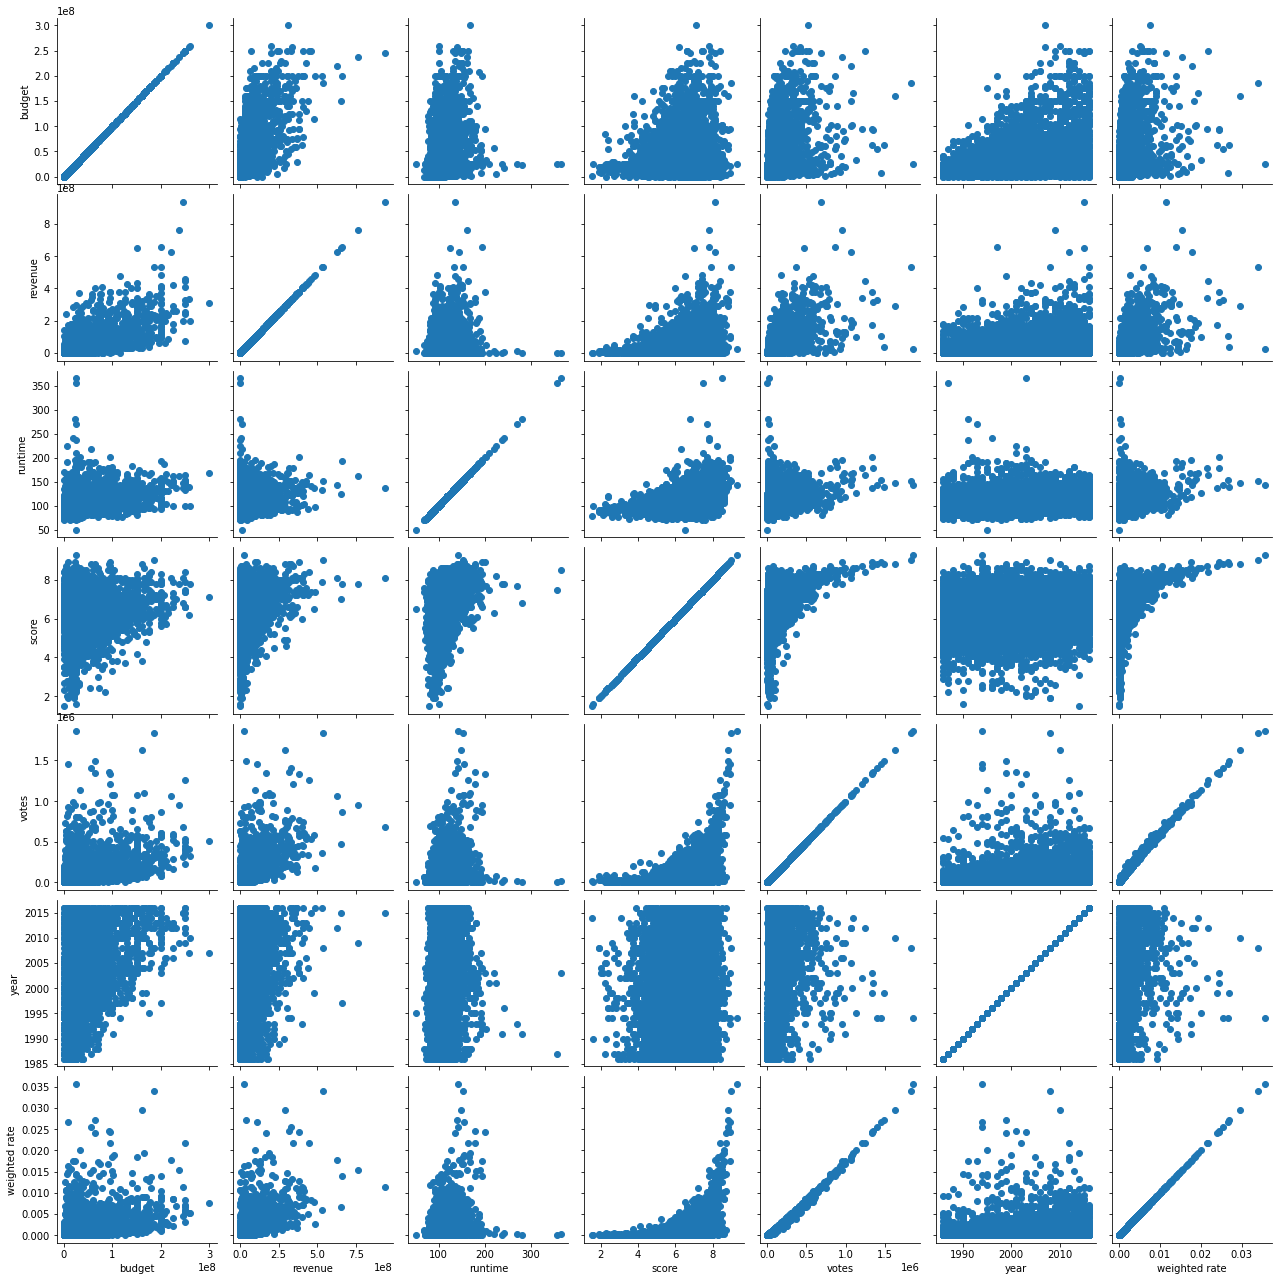

In [88]:
g = sns.PairGrid(df)
g = g.map(plt.scatter)


> The most perfect correlation (except auto-correlations or variance) is the one between the weighted rate and the votes since they're two interdependent features which and weighted rate was obtained thanks to a weightening operation on the score by votes.

> The lowest correlation ratio is the one between score and budget which can be easily noticed with the plot where the points are all spread out without any  relation in terms of their variation



> Most of the numerical features do not have a good correlation ratio with each other


> The movies that got higher numbers of votes than the other films got also higher scores.So, there is a certain positive proportion between score and votes since logically a well-known movie would have many followers and voters and also a good rate.




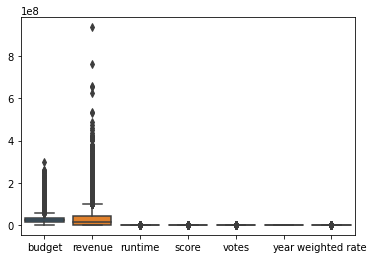

In [116]:
D=S.fit_transform(DF)
box_plot=sns.boxplot(data=df)

We noticed that we need to standardize features in order to have a more correct analysis

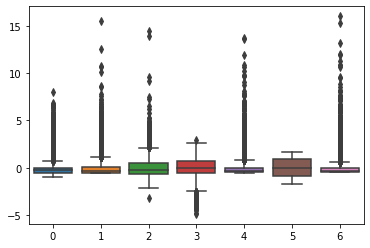

In [117]:
box_plot=sns.boxplot(data=D)

The features selected for our predictive model ("budget" and " votes" )as well as our target ("revenue") have many outliers which is likely to affect our prediction.

In [89]:
#making a copy with transformed categorical data
from sklearn.preprocessing import LabelEncoder
df0=df.copy()
encoder=LabelEncoder()
df0['country']=encoder.fit_transform(df0['country'])
df0['company']=encoder.fit_transform(df0['company'])
df0['star']=encoder.fit_transform(df0['star'])
df0['director']=encoder.fit_transform(df0['director'])
df0['name']=encoder.fit_transform(df0['name'])
df0['writer']=encoder.fit_transform(df0['writer'])
onehotenc=pd.get_dummies(data=df0,columns=['rating','genre'])
onehotenc


,budget,company,country,director,revenue,name,runtime,score,star,votes,writer,year,weighted rate,rating_B,rating_B15,rating_G,rating_NC-17,rating_NOT RATED,rating_Not specified,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-MA,rating_TV-PG,rating_UNRATED,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
0,8.000000e+06,665,54,2192,52287414.0,4661,89,8.1,2454,299174,3716,1986,0.004989,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6.000000e+06,1680,54,1296,70136369.0,1821,103,7.8,1605,264740,1970,1986,0.004251,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.500000e+07,1680,54,2645,179800601.0,6203,110,6.9,2345,236909,1852,1986,0.003365,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.850000e+07,2062,54,1066,85160248.0,295,137,8.4,2192,540152,1629,1986,0.009341,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.000000e+06,2122,54,2123,18564613.0,1872,90,6.9,1139,36636,2549,1986,0.000520,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,2.458113e+07,1013,53,1623,4750497.0,230,91,5.4,1066,9161,1800,2016,0.000102,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6816,2.458113e+07,1914,54,1989,28368.0,3430,90,4.9,2146,1959,3008,2016,0.000020,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6817,3.500000e+06,2124,54,2313,3775000.0,577,76,6.5,1355,36333,450,2016,0.000486,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6818,2.458113e+07,415,54,1914,25981.0,5272,76,6.2,1370,6947,2946,2016,0.000089,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [90]:
df['star'].value_counts()

Nicolas Cage          42
Robert De Niro        38
Denzel Washington     36
Tom Hanks             35
Bruce Willis          33
                      ..
Justine Bateman        1
Lindsey Haun           1
Josse De Pauw          1
Hringur Ingvarsson     1
Thom Mathews           1
Name: star, Length: 2504, dtype: int64

In [91]:
Actors=df['star'].value_counts()
def top_funct(c,m):
  l=dict(c)
  l1=[]
  l2=[]
  for k,v in l.items():
    if l[k]>=m:
      l1.append(k)
      l2.append(v)
  return l1,l2
top_funct(Actors,25)


(['Nicolas Cage',
  'Robert De Niro',
  'Denzel Washington',
  'Tom Hanks',
  'Bruce Willis',
  'Johnny Depp',
  'Adam Sandler',
  'Ben Stiller',
  'Tom Cruise',
  'Kevin Costner',
  'John Cusack',
  'Eddie Murphy',
  'John Travolta',
  'Robin Williams',
  'Sylvester Stallone'],
 [42, 38, 36, 35, 33, 32, 27, 27, 27, 26, 26, 25, 25, 25, 25])

These are the top 10 actors in the last 30 years who have appeared the most during that period of time.

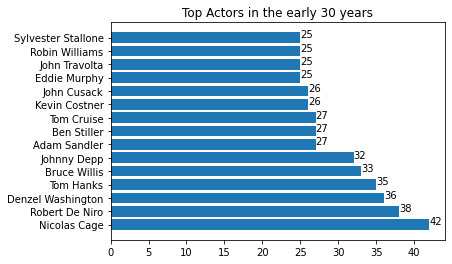

In [92]:
import numpy as np
def cast_crew_hplot(a,b,t):
  height = b
  bars = a
  y_pos = np.arange(len(bars))
 
  # Create horizontal bars
  plt.barh(y_pos, height)
 
  # Create names on the y-axis
  plt.yticks(y_pos, bars)
  plt.title(t) 
  for index, value in enumerate(height):
    plt.text(value, index, str(value))
  # Show graphic
  plt.show()
#plotting 
l1=top_funct(Actors,25)[0]
l2=list(top_funct(Actors,25)[1])
cast_crew_hplot(l1,l2,'Top Actors in the early 30 years')

In [93]:
df['company'].value_counts()

Universal Pictures                        302
Warner Bros.                              294
Paramount Pictures                        259
Twentieth Century Fox Film Corporation    205
New Line Cinema                           172
                                         ... 
First Take                                  1
Black Entertainment Television (BET)        1
Luna Films                                  1
Mosaic Film Group                           1
Kanoon                                      1
Name: company, Length: 2179, dtype: int64

In [94]:
Companies=df['company'].value_counts()
top_funct(Companies,200)

(['Universal Pictures',
  'Warner Bros.',
  'Paramount Pictures',
  'Twentieth Century Fox Film Corporation'],
 [302, 294, 259, 205])

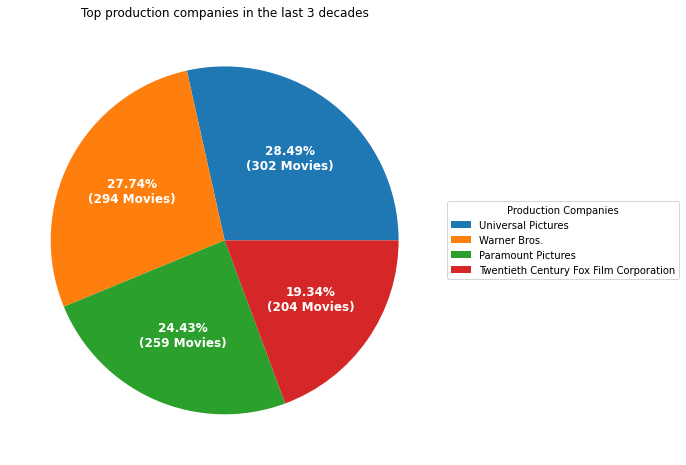

In [114]:
l1=list(top_funct(Companies,200)[0])
l2=list(top_funct(Companies,200)[1])
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:d} Movies)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(l2, autopct=lambda pct: func(pct, l2),
                                textprops=dict(color="w"))
ax.legend(wedges, l1,
          title="Production Companies",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Top production companies in the last 3 decades")

plt.show()

In [96]:
df['writer'].value_counts()

Woody Allen         32
Luc Besson          25
Stephen King        22
John Hughes         18
David Mamet         14
                    ..
Tony Hendra          1
Stephen Sinclair     1
Travis Walton        1
Brian Tucker         1
John Berendt         1
Name: writer, Length: 4199, dtype: int64

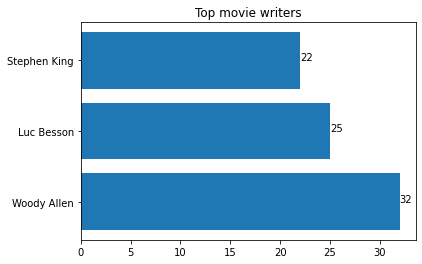

In [97]:
Writers=df['writer'].value_counts()
top_funct(Writers,20)
l1=top_funct(Writers,20)[0]
l2=top_funct(Writers,20)[1]
cast_crew_hplot(l1,l2,'Top movie writers')

In [98]:
df['director'].value_counts()

Woody Allen          33
Clint Eastwood       24
Steven Soderbergh    21
Steven Spielberg     21
Ron Howard           20
                     ..
Gabriel Axel          1
Will Mackenzie        1
Allan Arkush          1
Ted Nicolaou          1
Nicole Conn           1
Name: director, Length: 2759, dtype: int64

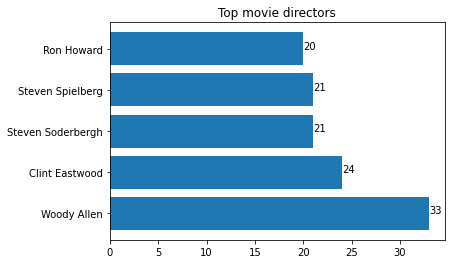

In [99]:
Directors=df['director'].value_counts()
top_funct(Directors,20)
l1=top_funct(Directors,20)[0]
l2=top_funct(Directors,20)[1]
cast_crew_hplot(l1,l2,'Top movie directors')

In [100]:
df['genre'].value_counts()

Comedy       2080
Drama        1444
Action       1331
Crime         522
Adventure     392
Biography     359
Horror        277
Animation     277
Mystery        38
Fantasy        32
Thriller       18
Romance        15
Family         14
Sci-Fi         13
Musical         4
Western         2
War             2
Name: genre, dtype: int64

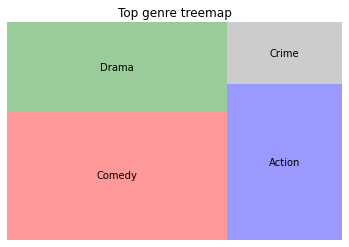

In [101]:
Genre=df['genre'].value_counts()
top_funct(Genre,400)
l1=top_funct(Genre,400)[0]
l2=top_funct(Genre,400)[1]
!pip install squarify
import squarify 

# Change color

squarify.plot(sizes=list(l2), label=list(l1), color=["red","green","blue", "grey"], alpha=.4 )
plt.axis('off')
plt.title('Top genre treemap')
plt.show()

In [102]:
df['rating'].value_counts()

R                3392
PG-13            1995
PG                951
NOT RATED         174
G                 147
UNRATED            71
Not specified      63
NC-17              22
TV-PG               1
TV-14               1
B                   1
B15                 1
TV-MA               1
Name: rating, dtype: int64

In [103]:
df.loc[df['rating'] =='NOT RATED', 'rating'] = 'Not specified'
df.loc[df['rating'] =='UNRATED', 'rating'] = 'Not specified'

In [104]:
df['rating'].value_counts()

R                3392
PG-13            1995
PG                951
Not specified     308
G                 147
NC-17              22
TV-PG               1
TV-14               1
B                   1
B15                 1
TV-MA               1
Name: rating, dtype: int64

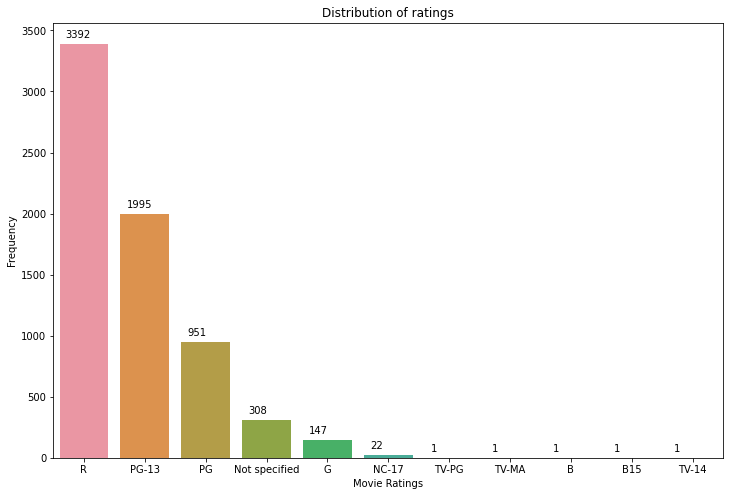

In [105]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="rating", data=df, )
plt.title('Distribution of ratings')
plt.xlabel('Movie Ratings')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Most of the movies were "R" rated ones  that means that they were either restricted or  required accompanying parent or adult guardian for teenagers under 17 , other films were recommended to be parental guided since some of their material might be inappropriate for children under 13.This barplot may give us an idea about the main targets for movies during the last 3 decades.

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics
x= df[['budget','votes','year','score']].values
y= df['revenue'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=40)  
lg=LinearRegression()
lg.fit(x_train, y_train)
predicted=lg.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
print('a=',lg.coef_)
print('b=',lg.intercept_)


MSE 1379526907493119.8
R squared 0.6452955329266411
a= [ 8.25347846e-01  2.05184396e+02 -1.52442980e+05 -2.21421762e+06]
b= 311097611.802364


MSE 2005026324801508.2
R squared 0.4844668921324963
a= [293.47593227]
b= 12419801.362524804


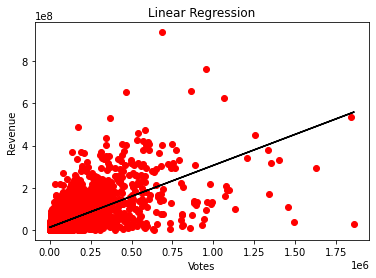

In [155]:
x= df[['votes']].values
y= df['revenue'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=40)  
lg=LinearRegression()
lg.fit(x_train, y_train)
predicted=lg.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
print('a=',lg.coef_)
print('b=',lg.intercept_)
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Revenue")
plt.xlabel("Votes")
plt.plot(x,lg.predict(x),color="k")
plt.show()

The Linear regression isn't the best predictive model having as a target the revenue and as a feature votes.

MSE 2020952587330674.0
R squared 0.48037192563913234
a= [1.1734648]
b= -4816814.422828272


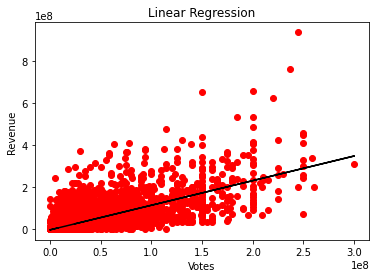

In [158]:
x= df[['budget']].values
y= df['revenue'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=40)  
lg=LinearRegression()
lg.fit(x_train, y_train)
predicted=lg.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
print('a=',lg.coef_)
print('b=',lg.intercept_)
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Revenue")
plt.xlabel("Votes")
plt.plot(x,lg.predict(x),color="k")
plt.show()

The same comment with budget as a feature

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   budget         6820 non-null   float64
 1   company        6820 non-null   object 
 2   country        6820 non-null   object 
 3   director       6820 non-null   object 
 4   genre          6820 non-null   object 
 5   revenue        6820 non-null   float64
 6   name           6820 non-null   object 
 7   rating         6820 non-null   object 
 8   runtime        6820 non-null   int64  
 9   score          6820 non-null   float64
 10  star           6820 non-null   object 
 11  votes          6820 non-null   int64  
 12  writer         6820 non-null   object 
 13  year           6820 non-null   int64  
 14  weighted rate  6820 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 799.3+ KB


In [108]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
df1=df.copy()
DF=df.drop(['company','country','director','genre','name','rating','star','writer'],axis=1)
DF.head()

,budget,revenue,runtime,score,votes,year,weighted rate
0,8000000.0,52287414.0,89,8.1,299174,1986,0.004989
1,6000000.0,70136369.0,103,7.8,264740,1986,0.004251
2,15000000.0,179800601.0,110,6.9,236909,1986,0.003365
3,18500000.0,85160248.0,137,8.4,540152,1986,0.009341
4,9000000.0,18564613.0,90,6.9,36636,1986,0.000520


In [115]:
from sklearn import datasets
import pandas as pd
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
X=df[['votes', 'budget','revenue','year']] #features
y=df['revenue']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3)
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6593352883675464


In [145]:
from sklearn.preprocessing import PolynomialFeatures
x= DF[['votes','budget']].values
y= DF['revenue'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)  
lg=LinearRegression()
poly = PolynomialFeatures(degree = 2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  1285529570995816.5
R squared:  0.6913013885565332


a= [ 0.00000000e+00  5.23402137e+02 -4.83609587e-04  1.70871317e-10]
b= 3866572.474688798


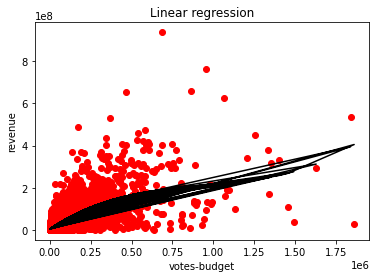

In [160]:
x=DF[['votes']]
y= DF['revenue'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)  
lg=LinearRegression()
poly = PolynomialFeatures(degree = 3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
print('a=',lg.coef_)
print('b=',lg.intercept_)

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("revenue")
plt.xlabel("votes-budget")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

a= [0.00000000e+00 8.45231657e-01 1.88459026e-09]
b= 1593757.241915632


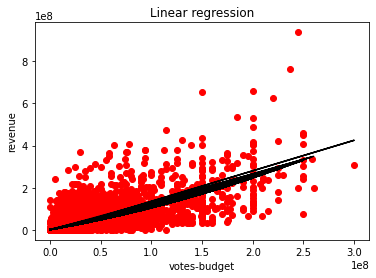

In [161]:
x=DF[['budget']]
y= DF['revenue'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)  
lg=LinearRegression()
poly = PolynomialFeatures(degree = 2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
print('a=',lg.coef_)
print('b=',lg.intercept_)
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("revenue")
plt.xlabel("votes-budget")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
x=onehotenc[[ "star","director",
      "writer","runtime","genre_War","genre_Horror","genre_Crime"]]
y=onehotenc["rating_R"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.58


In [125]:
confmatrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
print(confmatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Predicted     0    1
Actual              
0          1144   59
1           952  232
              precision    recall  f1-score   support

           0       0.55      0.95      0.69      1203
           1       0.80      0.20      0.31      1184

    accuracy                           0.58      2387
   macro avg       0.67      0.57      0.50      2387
weighted avg       0.67      0.58      0.51      2387



In [118]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=onehotenc.drop(["company", "name", "country", "rating_B", "year"], axis=1)
y= onehotenc["rating_R"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:1.0
